In [1]:
% pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
import pickle
import pandas as pd
import requests
from bs4 import BeautifulSoup
import sys
import os
from collections import defaultdict
import re
import json
from collections import Counter
import dateutil
from dateutil import parser
from collections import defaultdict
from __future__ import division
import datetime
%pylab inline
from numpy import arange
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.options.display.mpl_style = 'default'

Populating the interactive namespace from numpy and matplotlib


In [5]:
def parseint(string):
    string = str(string)
    return int(''.join([x for x in string if x.isdigit()]))

In [6]:
with open('movie_info_revised.p' ,'r') as picklefile:
    data = pickle.load(picklefile)

In [7]:
def date_helper(date):
    try:
        date = parser.parse(date)
        return True
    except: 
        pass
    return False

In [16]:
history_keys_dic = defaultdict(dict)
for key in data.keys():
    if 'Action' in data[key]['genre'] and 'Adventure' in data[key]['genre']:
        if date_helper(data[key]['date']):
            year = parser.parse(data[key]['date']).year
            history_keys_dic['count'][year]= history_keys_dic['count'].get(year, 0) + 1  
history_df = pd.DataFrame.from_dict(history_keys_dic)
start = pd.datetime(1980, 1, 1)
end = pd.datetime(2016, 1, 1)
x = pd.date_range(start, end, freq='A').year
history_df_years = history_df.reindex(x)
history_df = history_df_years.fillna(0)
history_df['rolling mean']=pd.rolling_mean(history_df['count'], 5).shift(+1)
history_df['difference from mean']=history_df['count']/history_df['rolling mean']

In [17]:
history_keys_dic

defaultdict(<type 'dict'>, {'count': {1972: 1, 1973: 3, 1974: 6, 1975: 4, 1976: 1, 1977: 8, 1978: 3, 1979: 5, 1980: 7, 1981: 7, 1982: 6, 1983: 10, 1984: 12, 1985: 13, 1986: 11, 1987: 6, 1988: 10, 1989: 7, 1990: 9, 1991: 7, 1992: 4, 1993: 9, 1994: 13, 1995: 10, 1996: 13, 1997: 21, 1998: 17, 1999: 14, 2000: 14, 2001: 16, 2002: 17, 2003: 19, 2004: 20, 2005: 20, 2006: 15, 2007: 17, 2008: 25, 2009: 18, 2010: 12, 2011: 22, 2012: 17, 2013: 14, 2014: 10, 2015: 17, 2016: 4}})

In [18]:
df = history_df.reset_index()

In [19]:
df['cutoff'] = 1.5

In [20]:
df

,index,count,rolling mean,difference from mean,cutoff
0,1980,7,NaN,NaN,1.5
1,1981,7,NaN,NaN,1.5
2,1982,6,NaN,NaN,1.5
3,1983,10,NaN,NaN,1.5
4,1984,12,NaN,NaN,1.5
5,1985,13,8.4,1.547619,1.5
6,1986,11,9.6,1.145833,1.5
7,1987,6,10.4,0.576923,1.5
8,1988,10,10.4,0.961538,1.5
9,1989,7,10.4,0.673077,1.5


In [21]:
df['cutoff'] = 1.5
df = history_df.reset_index()
count = df['count']
rolling_mean = df['rolling mean']
difference_mean = df['difference from mean']
date = df['index']
cutoff = df['cutoff']
figure(figsize=(15,8))
# red dashes, blue squares and green triangles
plt.plot(date, count, 'r-', date, rolling_mean, 'b-', date, difference_mean, 'g-', date, cutoff, 'y-')
plt.show()

KeyError: 'cutoff'

In [22]:
history_dic = defaultdict(dict)
for key in data.keys():
    if 'Action' in data[key]['genre'] and 'Adventure' in data[key]['genre']:
        if date_helper(data[key]['date']):
            year = parser.parse(data[key]['date']).year
            history_dic[year][key]= defaultdict(dict)
            history_dic[year][key]['date']= data[key]['date']
            history_dic[year][key]['screens']= data[key]['screens']
            history_dic[year][key]['opening']= data[key]['opening']
                #space_dic['space'][year].append(key,)

In [23]:
history_dic

defaultdict(<type 'dict'>, {1972: {'The Poseidon Adventure': defaultdict(<type 'dict'>, {'date': '13 December 1972', 'screens': '25', 'opening': '$264,850'})}, 1973: {'Live and Let Die': defaultdict(<type 'dict'>, {'date': '27 June 1973', 'screens': 'n/a', 'opening': 'n/a'}), 'Shaft in Africa': defaultdict(<type 'dict'>, {'date': '14 June 1973', 'screens': 'Error', 'opening': 'N/A'}), 'Emperor of the North': defaultdict(<type 'dict'>, {'date': '23 May 1973', 'screens': 'Error', 'opening': 'N/A'})}, 1974: {'Stone': defaultdict(<type 'dict'>, {'date': '28 June 1974', 'screens': 'Error', 'opening': 'N/A'}), 'Gold': defaultdict(<type 'dict'>, {'date': '16 October 1974', 'screens': 'Error', 'opening': 'N/A'}), 'The Golden Voyage of Sinbad': defaultdict(<type 'dict'>, {'date': '12 April 1974', 'screens': 'Error', 'opening': 'N/A'}), 'The Three Musketeers': defaultdict(<type 'dict'>, {'date': '29 March 1974', 'screens': 'Error', 'opening': 'N/A'}), 'The Man with the Golden Gun': defaultdict(<

In [24]:
def makedf(genre):
    frames = []
    years = []
    for year, movies in genre.items():
        years.append(year)
        frames.append(pd.DataFrame.from_dict(movies, orient='index'))
    genre = pd.concat(frames, keys=years)
    genre = genre[genre.screens != 'N/A']
    genre = genre[genre.screens != 'n/a']
    genre = genre[genre.screens != 'Error']
    genre = genre[genre.opening != 'N/A']
    genre = genre[genre.screens != '']
    genre = genre[genre.opening != '']
    genre = genre[genre.opening != 'n/a']
    genre = genre[genre.opening != 'Error']
    genre['opening'] = genre['opening'].map(lambda x: parseint(x))
    genre['screens'] = genre['screens'].map(lambda x: parseint(x))
    genre['date'] = genre['date'].map(lambda x: parser.parse(x))
    genre['normalized_opening']= genre['opening']/genre['screens']
    genre = genre[genre.normalized_opening < 20000]
    return genre

In [25]:
genre=makedf(history_dic)
pd.set_option('display.max_rows', 1000)
genre1 = genre[genre.screens > 50]
genre1 = genre1.reset_index()
genre1

,level_0,level_1,date,screens,opening,normalized_opening
0,1977,The Spy Who Loved Me,1977-08-03,194,1347927,6948.077320
1,1979,Moonraker,1979-06-29,788,7108344,9020.741117
2,1980,Bronco Billy,1980-06-11,1321,3708710,2807.501893
3,1980,Flash Gordon,1980-12-05,823,3934030,4780.109356
4,1980,Star Wars: Episode V - The Empire Strikes Back,1980-06-20,823,10840307,13171.697448
5,1980,The Island,1980-06-13,584,3123267,5348.059932
6,1980,When Time Ran Out...,1980-03-28,677,1400994,2069.415066
7,1981,Dragonslayer,1981-06-26,868,2407939,2774.123272
8,1981,For Your Eyes Only,1981-06-26,952,6834967,7179.587185
9,1981,Raiders of the Lost Ark,1981-06-12,1078,8305823,7704.845083


In [26]:
trend = genre1[117:146]

trend

,level_0,level_1,date,screens,opening,normalized_opening
117,1996,Broken Arrow,1996-02-09,2388,15583510,6525.757956
118,1996,Daylight,1996-12-06,2175,10015875,4605.000000
119,1996,DragonHeart,1996-05-31,2130,15027150,7055.000000
120,1996,Escape from L.A.,1996-08-09,2312,8912557,3854.912197
121,1996,Executive Decision,1996-03-15,2232,12069780,5407.607527
122,1996,Fled,1996-07-19,2104,5405855,2569.322719
123,1996,Independence Day,1996-07-03,2882,50228264,17428.266482
124,1996,Mission: Impossible,1996-05-22,3012,45436830,15085.268924
125,1996,Muppet Treasure Island,1996-02-16,2070,7906689,3819.656522
126,1996,Screamers,1996-01-26,1560,2904140,1861.628205


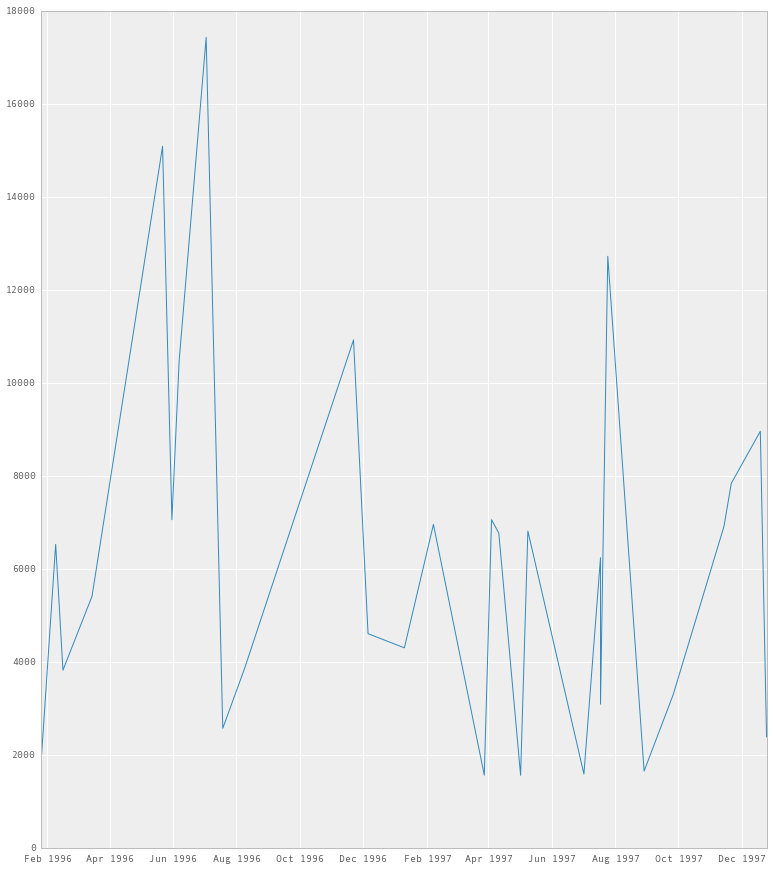

In [27]:
figure(figsize=(13,15))
trend = trend.sort(['date'])
plt.plot(trend['date'], trend['normalized_opening'])

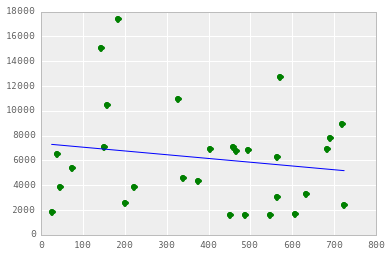

In [28]:
trend['time_delta']=trend['date'].apply(lambda x: str(x - parser.parse('1996-01-01')))
trend['time_delta_num'] = trend['time_delta'].str.replace(r'days[\s\S]+', '').apply(lambda x: int(x))

def sort_season(x):
    if x == 1:
        return 'January'
    if x == 2:
        return 'February'
    if x == 3:
        return 'March'
    if x == 4:
        return 'April'
    if x == 5:
        return 'May'
    if x == 6:
        return 'June'
    if x == 7:
        return 'July'
    if x == 8:
        return 'August'
    if x == 9:
        return 'September'
    if x == 10:
        return 'October'
    if x == 12:
        return 'November'
    if x == 12:
        return 'December'

trend['season']=trend['date'].apply(lambda x: sort_season(x.month))
from patsy import dmatrices
from patsy import dmatrix
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
#plot_data = trend
y, X = dmatrices('normalized_opening ~ time_delta_num  ', data = trend, return_type= 'dataframe')
model = sm.OLS(y, X)
fitted = model.fit()
plot(X['time_delta_num'], y, 'go')
plot(X['time_delta_num'], fitted.fittedvalues, 'b')



In [29]:
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     normalized_opening   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                 -0.008
Method:                 Least Squares   F-statistic:                    0.7693
Date:                Mon, 12 Oct 2015   Prob (F-statistic):              0.388
Time:                        08:47:43   Log-Likelihood:                -281.44
No. Observations:                  29   AIC:                             566.9
Df Residuals:                      27   BIC:                             569.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept       7368.5993   1552.749      4.746      0.000      4182.622  1.06e+04
time_delta_num    -3.0316      3.456     -0.877      0.388       -10.124     4.060
==============================================================================
Omnibus:                        5.313   Durbin-Watson:                   2.243
Prob(Omnibus):                  0.070   Jarque-Bera (JB):                4.083
Skew:                           0.911   Prob(JB):                        0.130
Kurtosis:                       3.239   Cond. No.                         914.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [84]:
#trend = trend.reset_index()
with open('actionadventure_df.p', 'w') as picklefile:
    pickle.dump(trend, picklefile)